In [32]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Normalize images
train_images = train_images / 255.0
test_images = test_images / 255.0

# Define input shape
input_shape = train_images[0].shape
print(input_shape)
shape_shape = (-1, 1,28,28)
# Define encoder model
latent_dims = 32

class Autoencoderv(tf.keras.Model):
  
  def __init__(self, latent_dim):
    super(Autoencoderv, self).__init__()
    self.latent_dim = latent_dim 
    encoder_inputs = Input(shape=input_shape)
    x = Flatten()(encoder_inputs)
    x = Dense(512, activation='relu')(x)
    x = Dense(256, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    latent_space = Dense(latent_dims, activation='linear')(x)
    self.encoder = tf.keras.Model(encoder_inputs, latent_space, name='encoder')

    # Define decoder model
    decoder_inputs = Input(shape=(latent_dims,))
    x = Dense(128, activation='relu')(decoder_inputs)
    x = Dense(256, activation='relu')(x)
    x = Dense(512, activation='relu')(x)
    x = Dense(tf.reduce_prod(input_shape), activation='sigmoid')(x)
    decoder_outputs = Reshape(input_shape)(x)
    self.decoder = tf.keras.Model(decoder_inputs, decoder_outputs, name='decoder')


  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return  decoded


autoencodertf=Autoencoderv(latent_dims)
# Compile model
autoencodertf.compile(optimizer='adam', loss='mse')

# Train model
historytf = autoencodertf.fit(train_images, train_images, epochs=50, batch_size=128, shuffle=True, validation_data=(test_images, test_images))

(28, 28)
Epoch 1/50
469/469 [==============================] - 5s 5ms/step - loss: 0.0374 - val_loss: 0.0178
Epoch 2/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0152 - val_loss: 0.0125
Epoch 3/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0116 - val_loss: 0.0104
Epoch 4/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0100 - val_loss: 0.0092
Epoch 5/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0090 - val_loss: 0.0086
Epoch 6/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0083 - val_loss: 0.0081
Epoch 7/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0077 - val_loss: 0.0076
Epoch 8/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0073 - val_loss: 0.0075
Epoch 9/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0070 - val_loss: 0.0071
Epoch 10/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0067 - val_los

In [33]:
input_shape = train_images[0].shape
print(input_shape)
shape_shape = train_images[0].shape
# Define encoder model


(28, 28)


In [34]:
autoencodertf.encoder.summary()

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 512)               401920    
                                                                 
 dense_17 (Dense)            (None, 256)               131328    
                                                                 
 dense_18 (Dense)            (None, 128)               32896     
                                                                 
 dense_19 (Dense)            (None, 32)                4128      
                                                                 
Total params: 570,272
Trainable params: 570,272
Non-trainab

In [35]:
autoencodertf.decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32)]              0         
                                                                 
 dense_20 (Dense)            (None, 128)               4224      
                                                                 
 dense_21 (Dense)            (None, 256)               33024     
                                                                 
 dense_22 (Dense)            (None, 512)               131584    
                                                                 
 dense_23 (Dense)            (None, 784)               402192    
                                                                 
 reshape_2 (Reshape)         (None, 28, 28)            0         
                                                                 
Total params: 571,024
Trainable params: 571,024
Non-trainab

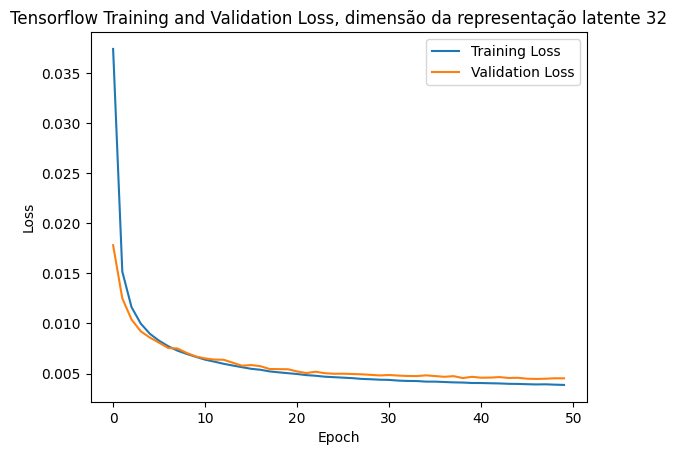

In [36]:
import matplotlib.pyplot as plt

# Plotando o histórico de treinamento
plt.plot(historytf.history['loss'], label='Training Loss')
plt.plot(historytf.history['val_loss'], label='Validation Loss')
plt.title('Tensorflow Training and Validation Loss, dimensão da representação latente %s'%latent_dims)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

313/313 [==============================] - 1s 3ms/step


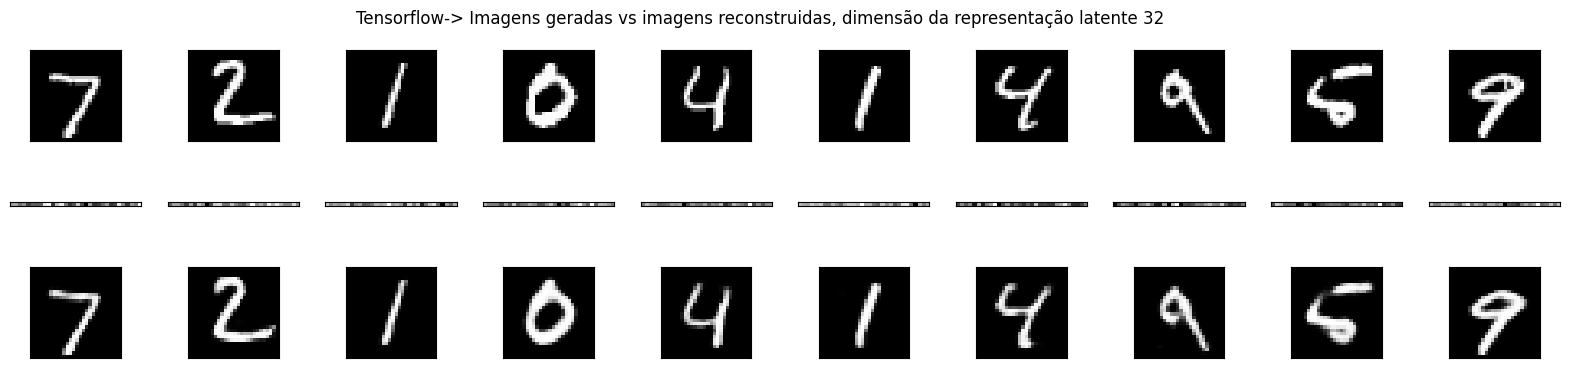

In [37]:
# Fazer previsões com o modelo
latent_space = autoencodertf.encoder(test_images)
decoded_imgs = autoencodertf.predict(test_images)

# Mostrar exemplos de imagens originais e reconstruídas
n = 10  # número de exemplos a serem mostrados
plt.figure(figsize=(20, 4))
for i in range(n):
    # Imagem original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(test_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Imagem original
    ax = plt.subplot(3, n, i +n+ 1)
    plt.imshow(latent_space[i].numpy().reshape(1, -1))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Imagem reconstruída
    ax = plt.subplot(3, n, i + n*2 + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


plt.suptitle('Tensorflow-> Imagens geradas vs imagens reconstruidas, dimensão da representação latente %s'%latent_dims)
plt.show()
save_results_to = 'Results/'


In [38]:
def save_model(model_,name):
  from os.path import join
  # Convert Keras model to a tflite model
  converter = tf.lite.TFLiteConverter.from_keras_model(model_)
  tflite_model = converter.convert()
  # Show model size in KBs.
  float_model_size = len(tflite_model) / 1024
  print('Float model size = %dKBs.' % float_model_size)
  save_results_to = '/Users/S/Desktop/Results/'
  open(name+ '_float.tflite', 'wb').write(tflite_model)


  # Re-convert the model to TF Lite using quantization.
  converter.optimizations = [tf.lite.Optimize.DEFAULT]
  tflite_quantized_model = converter.convert()

  # Show model size in KBs.
  quantized_model_size = len(tflite_quantized_model) / 1024
  print('Tf Quantized model size = %dKBs,' % quantized_model_size)
  print('which is about %d%% of the float model size.'\
        % (quantized_model_size * 100 / float_model_size))
  open(name+ '_quant.tflite', 'wb').write(tflite_model)


save_model(autoencodertf.encoder,'model_tensorflow_encoder_%s'%latent_dims)
save_model(autoencodertf.decoder,'model_tensorflow_decoder_%s'%latent_dims)

Float model size = 2230KBs.
Tf Quantized model size = 562KBs,
which is about 25% of the float model size.
Float model size = 2233KBs.
Tf Quantized model size = 566KBs,
which is about 25% of the float model size.


In [39]:
def predict(model,input_data):
  interpreter = tf.lite.Interpreter(model_path=model)
  interpreter.allocate_tensors()

  # Get input and output tensors.
  input_details= interpreter.get_input_details()
  output_details = interpreter.get_output_details()

  # Test the model on random input data.
  input_shape = input_details[0]['shape']
  print(input_details)
  print(input_shape)
  
  interpreter.set_tensor(input_details[0]['index'], input_data)
  interpreter.invoke()

  # The function `get_tensor()` returns a copy of the tensor data.
  # Use `tensor()` in order to get a pointer to the tensor.
  enc_data = interpreter.get_tensor(output_details[0]['index'])
  
  return enc_data




[{'name': 'serving_default_input_5:0', 'index': 0, 'shape': array([ 1, 28, 28], dtype=int32), 'shape_signature': array([-1, 28, 28], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
[ 1 28 28]
[{'name': 'serving_default_input_6:0', 'index': 0, 'shape': array([ 1, 32], dtype=int32), 'shape_signature': array([-1, 32], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
[ 1 32]
[{'name': 'serving_default_input_5:0', 'index': 0, 'shape': array([ 1, 28, 28], dtype=int32), 'shape_signature': array([-1, 28, 28], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtyp

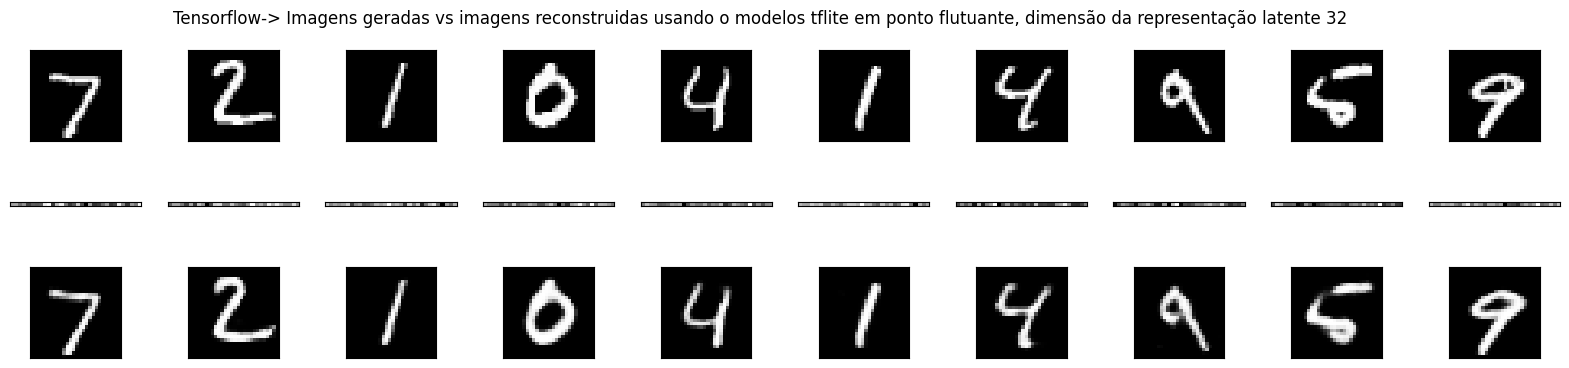

In [40]:
import numpy as np
# Mostrar exemplos de imagens originais e reconstruídas
n = 10  # número de exemplos a serem mostrados
model_encoder=f'model_tensorflow_encoder_{latent_dims}_float.tflite'
model_decoder=f'model_tensorflow_decoder_{latent_dims}_float.tflite'
plt.figure(figsize=(20, 4))
for i in range(n):
    # Imagem original
    image =[np.array(test_images[i],dtype="float32")]
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(test_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # espaço latente
    latent_space= predict(model_encoder,image)
    ax = plt.subplot(3, n, i +n+ 1)
    plt.imshow(latent_space)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Imagem reconstruída
    decoded_image= predict(model_decoder,latent_space)
    ax = plt.subplot(3, n, i + n*2 + 1)
    plt.imshow(decoded_image.reshape(28, 28))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.suptitle('Tensorflow-> Imagens geradas vs imagens reconstruidas usando o modelos tflite em ponto flutuante, dimensão da representação latente %s'%latent_dims)
plt.show()

[{'name': 'serving_default_input_5:0', 'index': 0, 'shape': array([ 1, 28, 28], dtype=int32), 'shape_signature': array([-1, 28, 28], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
[ 1 28 28]
[{'name': 'serving_default_input_6:0', 'index': 0, 'shape': array([ 1, 32], dtype=int32), 'shape_signature': array([-1, 32], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
[ 1 32]
[{'name': 'serving_default_input_5:0', 'index': 0, 'shape': array([ 1, 28, 28], dtype=int32), 'shape_signature': array([-1, 28, 28], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtyp

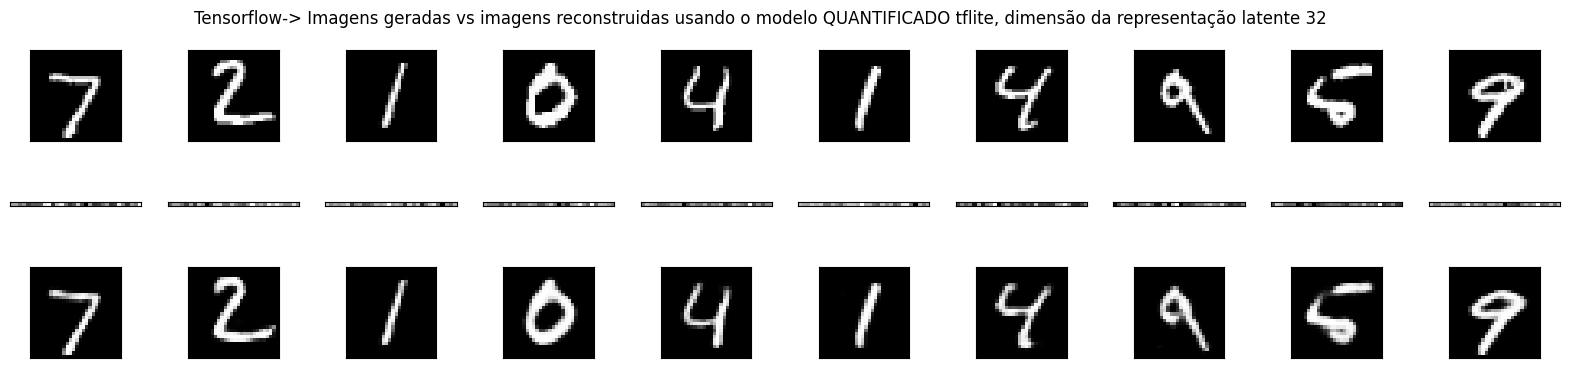

In [41]:
import numpy as np
# Mostrar exemplos de imagens originais e reconstruídas
n = 10  # número de exemplos a serem mostrados
model_encoder = f'model_tensorflow_encoder_{latent_dims}_quant.tflite'
model_decoder=f'model_tensorflow_decoder_{latent_dims}_quant.tflite'
plt.figure(figsize=(20, 4))
for i in range(n):
    # Imagem original
    image =[np.array(test_images[i],dtype="float32")]
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(test_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # espaço latente
    latent_space= predict(model_encoder,image)
    ax = plt.subplot(3, n, i +n+ 1)
    plt.imshow(latent_space)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Imagem reconstruída
    decoded_image= predict(model_decoder,latent_space)
    ax = plt.subplot(3, n, i + n*2 + 1)
    plt.imshow(decoded_image.reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


plt.suptitle('Tensorflow-> Imagens geradas vs imagens reconstruidas usando o modelo QUANTIFICADO tflite, dimensão da representação latente %s'%latent_dims)
plt.show()

In [42]:
espaco_latente=[0.70910525,5.0393157,-5.9599915,-1.3897146,1.1304882,-1.4336736,6.4825625,0.03365594,-1.493791,1.5771042,-0.81207585,1.2585714,0.8961393,-2.328696,0.86426497,-1.9402974]
espaco_latente =[np.array(espaco_latente,dtype="float32")]
dec_data= predict(f'model_tensorflow_decoder_{latent_dims}_quant.tflite',espaco_latente)
print(dec_data.shape)
plt.imshow(dec_data[0])

[{'name': 'serving_default_input_6:0', 'index': 0, 'shape': array([ 1, 32], dtype=int32), 'shape_signature': array([-1, 32], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
[ 1 32]


ValueError: ignored